<a href="https://colab.research.google.com/github/saikrishna1773/EV-Vehicle-Week1/blob/main/EV_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:


# Load Dataset
file_path = '/content/drive/MyDrive/EV Data for each countries.csv'
df = pd.read_csv(file_path)
df.head()



,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [ ]:


# Cleaning Missing Data
df = df.dropna(subset=['County', 'State']).copy()
df.isnull().sum()

,0
Date,0
County,0
State,0
Vehicle Primary Use,0
Battery Electric Vehicles (BEVs),0
Plug-In Hybrid Electric Vehicles (PHEVs),0
Electric Vehicle (EV) Total,0
Non-Electric Vehicle Total,0
Total Vehicles,0
Percent Electric Vehicles,0


In [ ]:
df.fillna(0, inplace=True)  # replaces NaNs with 0

In [ ]:
columns_to_clean = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles'
]

for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)


In [ ]:

# Converting Date Column
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].min(), df['Date'].max()


('April 30 2017', 'September 30 2023')

In [ ]:
from sklearn.model_selection import train_test_split

X = df[[
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Total Vehicles'
]]
y = df['Percent Electric Vehicles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Preview first few rows
X_train.head()


X_train shape: (16586, 3)
X_test shape: (4147, 3)
y_train shape: (16586,)
y_test shape: (4147,)


,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Total Vehicles
15643,296,131,67596
14809,0,1,248
19124,0,3,1306
14348,1,0,35
8214,1,0,5


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

=
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))


Mean Squared Error: 121.74
R² Score: 0.01


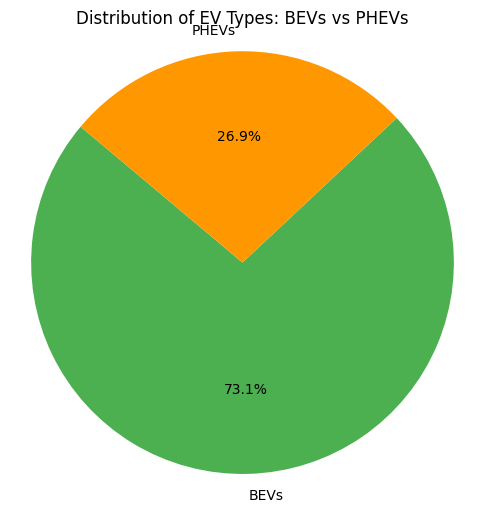

In [ ]:
# Total number of BEVs and PHEVs
total_bevs = df['Battery Electric Vehicles (BEVs)'].sum()
total_phevs = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([total_bevs, total_phevs],
        labels=['BEVs', 'PHEVs'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#4CAF50', '#FF9800'])
plt.title('Distribution of EV Types: BEVs vs PHEVs')
plt.axis('equal')
plt.show()


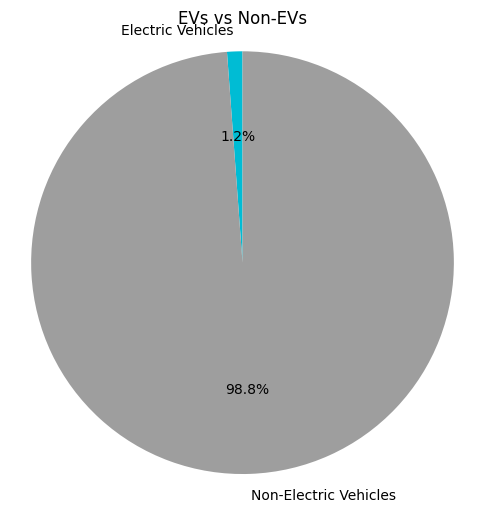

In [ ]:
# Totals
total_evs = df['Electric Vehicle (EV) Total'].sum()
total_nonevs = df['Non-Electric Vehicle Total'].sum()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([total_evs, total_nonevs],
        labels=['Electric Vehicles', 'Non-Electric Vehicles'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#00BCD4', '#9E9E9E'])
plt.title('EVs vs Non-EVs')
plt.axis('equal')
plt.show()


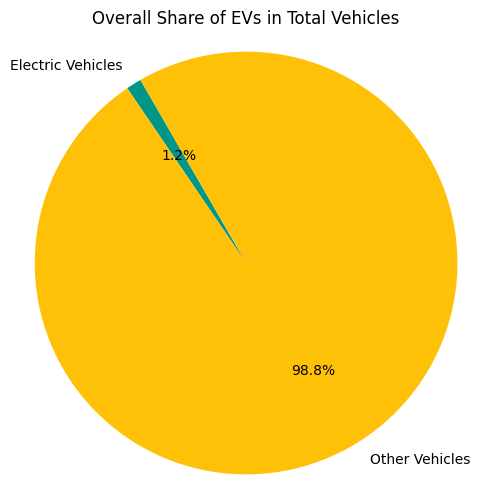

In [ ]:
# Total vehicles and EVs
total_vehicles = df['Total Vehicles'].sum()
total_evs = df['Electric Vehicle (EV) Total'].sum()
total_nonevs = total_vehicles - total_evs

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([total_evs, total_nonevs],
        labels=['Electric Vehicles', 'Other Vehicles'],
        autopct='%1.1f%%',
        startangle=120,
        colors=['#009688', '#FFC107'])
plt.title('Overall Share of EVs in Total Vehicles')
plt.axis('equal')
plt.show()


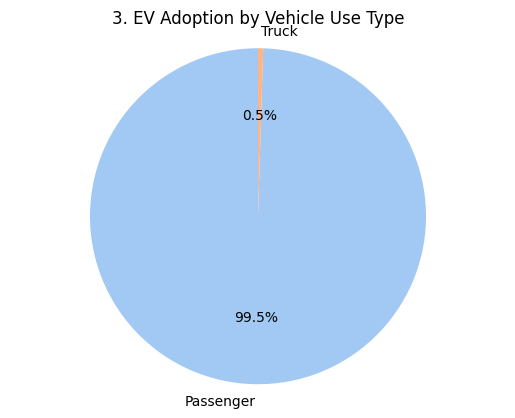

In [ ]:
# Group by use type
use_type = df.groupby('Vehicle Primary Use')['Electric Vehicle (EV) Total'].sum()

plt.pie(use_type, labels=use_type.index,
        autopct='%1.1f%%', colors=sns.color_palette("pastel"),
        startangle=90)
plt.title("3. EV Adoption by Vehicle Use Type")
plt.axis('equal')
plt.show()


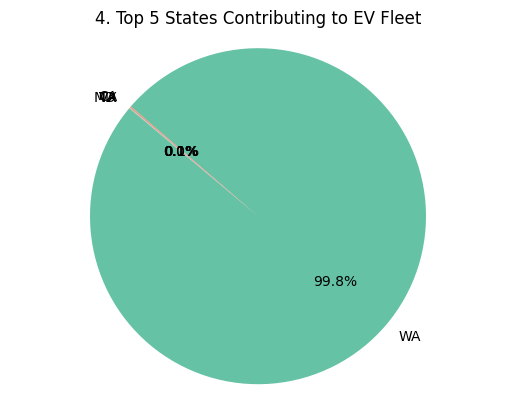

In [ ]:
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(5)

plt.pie(top_states, labels=top_states.index,
        autopct='%1.1f%%', colors=sns.color_palette("Set2"),
        startangle=140)
plt.title("4. Top 5 States Contributing to EV Fleet")
plt.axis('equal')
plt.show()


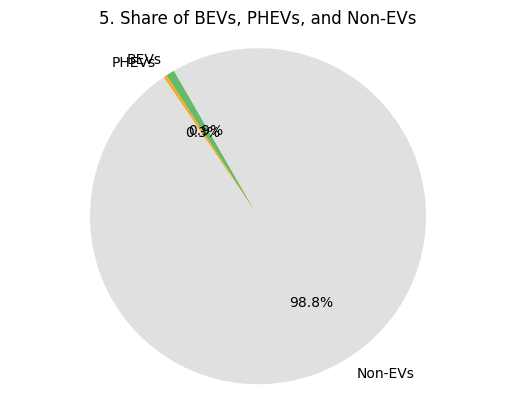

In [ ]:
bevs = df['Battery Electric Vehicles (BEVs)'].sum()
phevs = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
non_evs = df['Non-Electric Vehicle Total'].sum()

plt.pie([bevs, phevs, non_evs],
        labels=['BEVs', 'PHEVs', 'Non-EVs'],
        autopct='%1.1f%%',
        colors=['#66BB6A', '#FFA726', '#E0E0E0'],
        startangle=120)
plt.title("5. Share of BEVs, PHEVs, and Non-EVs")
plt.axis('equal')
plt.show()


/tmp/ipython-input-33-245776011.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, ax=axs[2], palette='viridis')


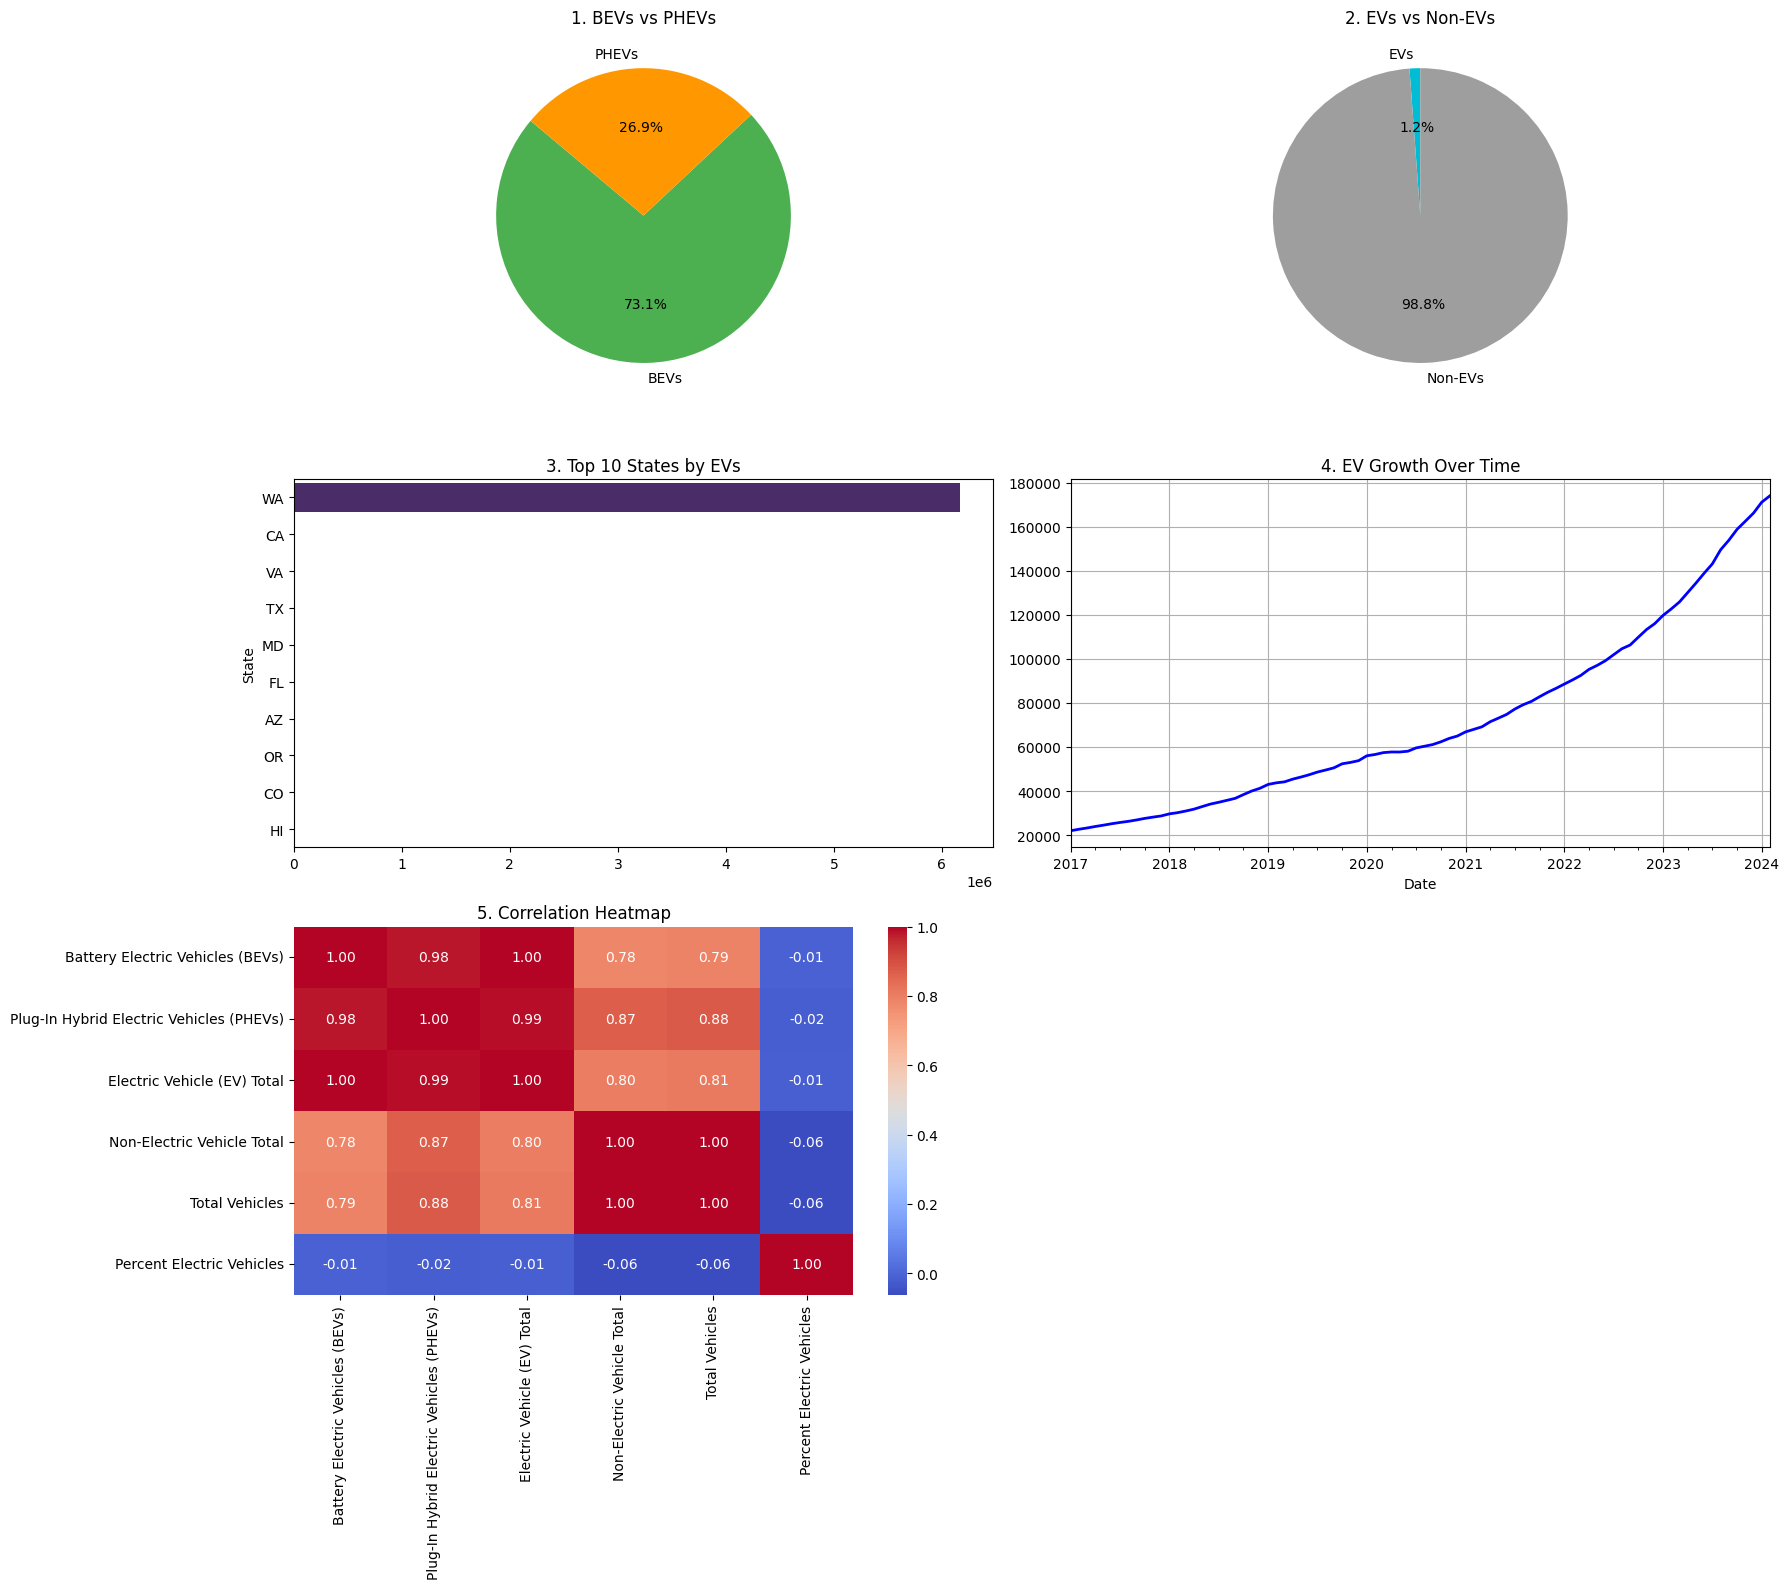

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = '/content/drive/MyDrive/EV Data for each countries.csv'  # or use your path
df = pd.read_csv(file_path)

# Clean
df = df.dropna(subset=['County', 'State']).copy()

cols_to_convert = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles'
]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

df['Date'] = pd.to_datetime(df['Date'])

# Set up figure
fig, axs = plt.subplots(3, 2, figsize=(18, 16))
axs = axs.flatten()

# Pie: BEVs vs PHEVs
bevs = df['Battery Electric Vehicles (BEVs)'].sum()
phevs = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
axs[0].pie([bevs, phevs], labels=['BEVs', 'PHEVs'],
           autopct='%1.1f%%', colors=['#4CAF50', '#FF9800'], startangle=140)
axs[0].set_title("1. BEVs vs PHEVs")

# Pie: EVs vs Non-EVs
ev_total = df['Electric Vehicle (EV) Total'].sum()
non_ev_total = df['Non-Electric Vehicle Total'].sum()
axs[1].pie([ev_total, non_ev_total], labels=['EVs', 'Non-EVs'],
           autopct='%1.1f%%', colors=['#00BCD4', '#9E9E9E'], startangle=90)
axs[1].set_title("2. EVs vs Non-EVs")

# Bar: Top 10 EV States
top_states = df.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index, ax=axs[2], palette='viridis')
axs[2].set_title("3. Top 10 States by EVs")

# Line: EV Growth
ev_trend = df.groupby('Date')['Electric Vehicle (EV) Total'].sum().sort_index()
ev_trend.plot(ax=axs[3], color='blue', linewidth=2)
axs[3].set_title("4. EV Growth Over Time")
axs[3].set_xlabel("Date")
axs[3].grid(True)

# Heatmap
vehicle_cols = cols_to_convert + ['Percent Electric Vehicles']
sns.heatmap(df[vehicle_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axs[4])
axs[4].set_title("5. Correlation Heatmap")

# Hide 6th subplot
axs[5].axis('off')

# Show all
plt.tight_layout()
plt.show()
